# Allen fMOST ingest demo 

In this notebook we will showcase loading neuronal reconstructions from [Sorensen et al](https://www.biorxiv.org/content/10.1101/2023.11.25.568393v1). 

To run this code you will need to install/download the following packages and data:
- the fMOST reconstructions (in our case kindly provided by S. Sorensen directly)
- the Allen CCF template downloaded from [here](https://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/average_template/)
- the following Python packages:
  - [navis](https://github.com/navis-org/navis) 
  - [navis-mousebrains](https://github.com/navis-org/navis-mousebrains/tree/main/mousebrains/data)

In [1]:
import navis
import mousebrains

In [2]:
# Load the HPF fMOST dataset (adjust file path as needed)
neurons = navis.read_swc(
    "UM1_DATA_swcFiles/"
)

# # Add meta data from CSV
neurons.add_metadata('UM1_DATA_swcFiles/MetaData.csv',
                      id_col='swc_name', neuron_id='file')

# # Show a quick summary of the loaded neurons
neurons

Importing:   0%|          | 0/110 [00:00<?, ?it/s]

,type,name,n_nodes,n_connectors,n_branches,n_leafs,cable_length,soma,units,created_at,origin,file
0,navis.TreeNeuron,18469_6731-X8443-Y39338_reg,65872,None,231,239,77686.390625,None,1 dimensionless,2024-06-11 11:51:23.354284,UM1_DATA_swcFiles/18469_6731-X8443-Y39338_reg.swc,18469_6731-X8443-Y39338_reg.swc
1,navis.TreeNeuron,18457_6269-X26956-Y8702_reg,25407,None,130,138,34936.582031,None,1 dimensionless,2024-06-11 11:51:23.367255,UM1_DATA_swcFiles/18457_6269-X26956-Y8702_reg.swc,18457_6269-X26956-Y8702_reg.swc
...,...,...,...,...,...,...,...,...,...,...,...,...
108,navis.TreeNeuron,18465_6342-X5487-Y11501_reg,17414,None,143,149,34682.078125,None,1 dimensionless,2024-06-11 11:51:24.964595,UM1_DATA_swcFiles/18465_6342-X5487-Y11501_reg.swc,18465_6342-X5487-Y11501_reg.swc
109,navis.TreeNeuron,17781_6802-X8324-Y14113_reg,48848,None,174,179,60230.136719,None,1 dimensionless,2024-06-11 11:51:24.986648,UM1_DATA_swcFiles/17781_6802-X8324-Y14113_reg.swc,17781_6802-X8324-Y14113_reg.swc


In [3]:
# Make our life a bit easier by translating the SWC labels
for n in neurons:
    # Set the soma based on the label
    n.soma = n.nodes.loc[n.nodes.label == 1, "node_id"].values[0]

    # Set a compartments column
    n.nodes["compartment"] = (
        n.nodes.label.map(
            {
                1: "soma",
                2: "axon",
                3: "dendrite",
                4: "apical dendrite",
            }
        )
        .astype(str)
        .fillna("undefined")
        .astype("category")
    )

KeyboardInterrupt: 

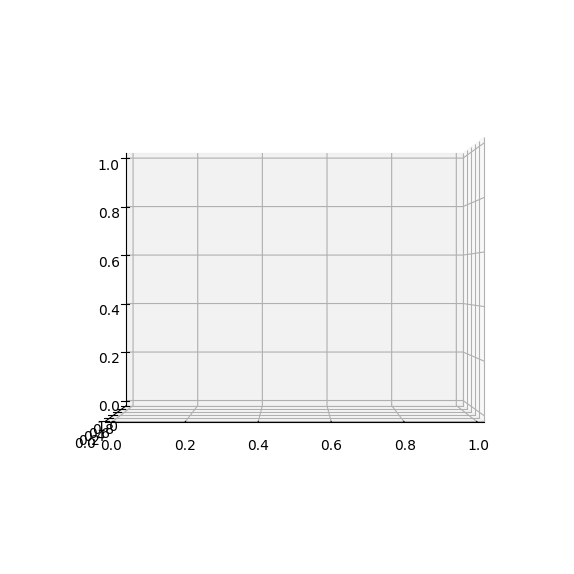

In [5]:
# Lets plot these neurons

# Set a colormap for the compartment
comp_colors = {
    "soma": "k",
    "axon": "blue",
    "dendrite": "red",
    "apical dendrite": "purple",
}

# N.B. the brain mesh is currently pretty high res which slows down plotting
# (might switch to a lower res version in the future)
navis.plot2d(
    [neurons, mousebrains.AllenCCF], color_by="compartment", palette=comp_colors
)

In [ ]:
# We can also generate an interactive 3D plot using the plotly backend
navis.plot3d(
    [neurons[:10], mousebrains.AllenCCF], color_by="compartment", palette=comp_colors
)